In [ ]:
# material de auxílio:

# https://www.dca.fee.unicamp.br/courses/EA978/2s2008/slides/quantiza.pdf
# https://edisciplinas.usp.br/pluginfile.php/4112485/mod_resource/content/0/V13%20-%20Quantização%20de%20cores.pdf

### Quantização Homogênea

In [227]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [228]:
from PIL import Image

Image.MAX_IMAGE_PIXELS = None # desativa o numero máximo de pixels da imagem (89 mp por default) https://stackoverflow.com/questions/25705773/image-cropping-tool-python

In [229]:
path = r'C:\Users\leand\OneDrive\Área de Trabalho\Vis Comp'

In [272]:
im = plt.imread(rf'{path}/imagem.jpg') 

(-0.5, 7682.5, 5062.5, -0.5)

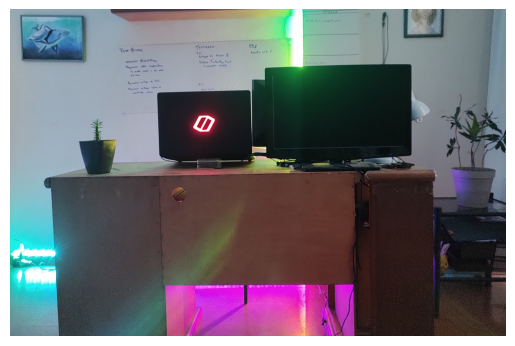

In [239]:
plt.imshow(im)
plt.axis('off')

In [303]:
r, g, b = cv2.split(im)    # separa os canais das imagens (matplotlib segue a ordem RGB, opencv segue a ordem BGR)

# https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_matplotlib_rgb_brg_image_load_display_save.php#:~:text=OpenCV%20follows%20BGR%20order%2C%20while%20matplotlib%20likely%20follows%20RGB%20order.

In [306]:
# a quantizacao será 256/n

#n = 2  # quantizacao = 256/2 = 128
#n = 4  # quantizacao = 128/4 = 64
#n = 8  # quantizacao = 128/8 = 32
n = 16 # quantizacao = 128

In [307]:
novo_r = (r // (256//n)) * (256//n)   # Aplica a quantização linear de cores no canal Red 
novo_g = (g // (256//n)) * (256//n)   # Aplica a quantização linear de cores no canal Green
novo_b = (b // (256//n)) * (256//n)   # Aplica a quantização linear de cores no canal Blue

In [308]:
im_2 = cv2.merge([novo_r, novo_g, novo_b])  # converte os canais (r, g e b) em uma unica imagem

im_2 = np.uint8(im_2)   # converte os niveis de intensidade para inteiros

im_2 = Image.fromarray(im_2)  # converte o array para um objeto de PIL.Image

In [309]:
im_2.show()

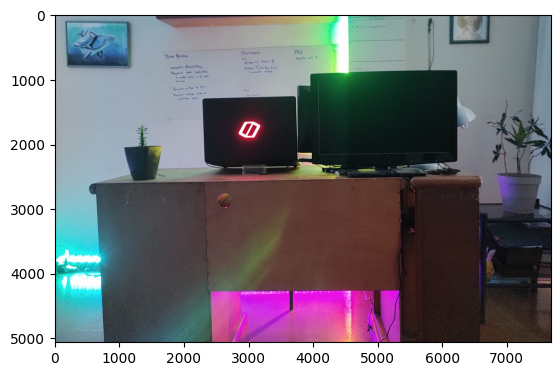

In [237]:
#plt.imshow(im_2)

### Quantização Não-Homogênea

In [166]:
''' A quantização de cores é o processo de reduzir o número de cores em uma imagem. 
Isso pode ser feito por vários motivos, como reduzir o tamanho do arquivo de imagem ou simplificar a imagem para facilitar o processamento.

Ao estudar a literatira, eu encontrei alguns algorítimos de quantização disponíveis, dentre eles:
Median Cut, Octree, Floyd-Steinberg, etc.

Para a resoulução dessa atividade, eu usei o método de K-means, pois é facilmente aplicavel pelo sklearn (e eu já possuia algum conhecimento dessa biblioteca)
'''


' A quantização de cores é o processo de reduzir o número de cores em uma imagem. \nIsso pode ser feito por vários motivos, como reduzir o tamanho do arquivo de imagem ou simplificar a imagem para facilitar o processamento.\n\nAo estudar a literatira, eu encontrei alguns algorítimos de quantização disponíveis, dentre eles:\nMedian Cut, Octree, Floyd-Steinberg, etc.\n\nPara a resoulução dessa atividade, eu usei o método de K-means, pois é facilmente aplicavel pelo sklearn (e eu já possuia algum conhecimento dessa biblioteca)\n'

In [167]:
import matplotlib.pyplot as plt
import numpy as np


from sklearn.cluster import KMeans
from sklearn.utils import shuffle

In [168]:
from PIL import Image

Image.MAX_IMAGE_PIXELS = None # desativa o numero máximo de pixels da imagem (89 mp por default) https://stackoverflow.com/questions/25705773/image-cropping-tool-python

In [169]:
path = '/content/drive/MyDrive/23.1 Visão Computacional'

In [170]:
im = plt.imread(f'{path}/imagem_original.jpg') 

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/23.1 Visão Computacional/imagem_original.jpg'

In [ ]:
im = np.array(im, dtype=np.float64) / 255  #normaliza a imagem (entre 0 e 1) para reduzir custos computacionais 

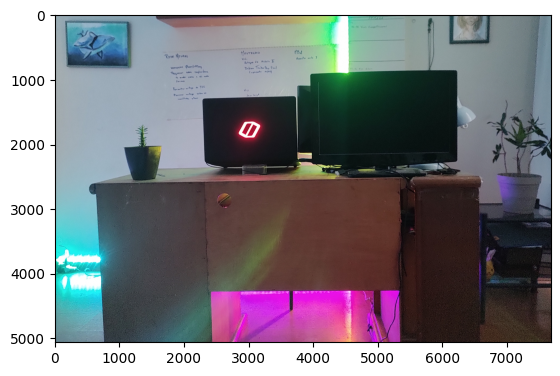

In [ ]:
plt.imshow(im)

In [ ]:
quantizacao = 128   # numero de cores para a redução de cores (quantização)
largura, altura, dimensao  = tuple(im.shape)

assert dimensao == 3  # verifica se a imagem possui três canais 

In [ ]:
im_array = np.reshape(im, (largura * altura, dimensao))

In [ ]:
amostras = shuffle(im_array, random_state=0)[ : int(im_array.shape[0]/1000)]  # cria uma amostragem aleatoria (de tamnaho = largura*altura/1000) dos pontos que definem a imagem original

In [ ]:
k_means = KMeans(n_clusters = quantizacao, random_state = 0).fit(amostras)  # faz a clusterização. A quantidade de cluster depende da quantidade desejada de cores (quantização)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
previsao = k_means.predict(im_array) # preve as cores na imagem original

In [ ]:
len(previsao) , len(previsao) == largura*altura

(2, False)

In [ ]:
# restaura a imagem original após a quantização

dimensao = k_means.cluster_centers_.shape[1]
imagem = np.zeros((largura, altura, dimensao))  
index = 0

for i in range(largura):    # itera pelos pixels da imagem e substitui pelo cluster mais adequado
  for j in range(altura):
    imagem[i][j] = k_means.cluster_centers_[previsao[index]]
    index += 1


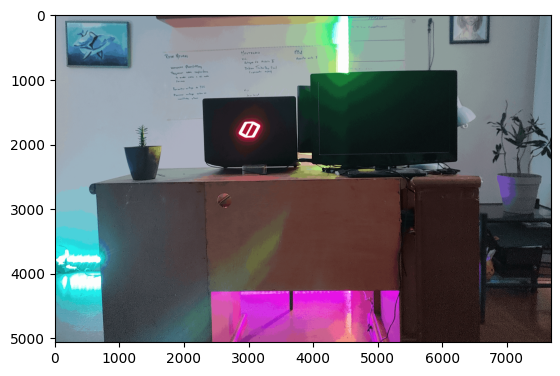

In [ ]:
plt.imshow(imagem)
plt.axis('off')

In [ ]:
plt.imsave(f'{path}/imagem_{quantizacao}.jpg', imagem , format = 'jpg')